##  Código da BER vs Eb/No com OFDM e sem OFDM para modulação 16-QAM:

In [ ]:
clear all; clc;
% Parâmetros
n_bits = 100000;              % Número de bits
EbN0dB = 0:1:14;
SnrdB = EbN0dB + 10*log10(log2(16)*(1));

for ik = 1:length(EbN0dB)
    for jk = 1:100
        % Gerar bits aleatórios
        dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
        dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
        % Conversor serial paralelo
        dataInMatrix = reshape(dataIn,n_bits/4,4);
        %
        % Gerar constelaçao 16-QAM
        seq16qam = 2*dataInMatrix(:,1)+dataInMatrix(:,2)+1i*(2*dataInMatrix(:,3)+dataInMatrix(:,4)); 
        seq16=seq16qam';
        % Garantir propriedadade da simetria
        X = seq16; 

        bits_transmitidos = zeros(1, length(X));
        index = 1;
        for k= 1:length(X) % Para percorrer todo o vetor Yk 
            if real(X(1,k)) > 0 % Para parte real de Yk positiva
                if real(X(1,k)) > 2
                    bits_transmitidos(1,index) = 1;
                    index = index + 1;
                    bits_transmitidos(1,index)= 1;
                    index = index + 1;
                else
                    bits_transmitidos(1,index) = 1;
                    index = index + 1;
                    bits_transmitidos(1,index)= 0;
                    index = index + 1;
                end
            else % Para parte real de Yk negativa ou igual a zero
                if real(X(1,k)) < -2
                    bits_transmitidos(1,index) = 0;
                    index = index + 1;
                    bits_transmitidos(1,index)= 0;
                    index = index + 1;
                else
                    bits_transmitidos(1,index) = 0;
                    index = index + 1;
                    bits_transmitidos(1,index)= 1;
                    index = index + 1;
                end
            end

            if imag(X(1,k)) > 0 % Para parte imaginaria de Yk positiva
                if imag(X(1,k)) > 2
                    bits_transmitidos(1,index) = 1;
                    index = index + 1;
                    bits_transmitidos(1,index)= 1;
                    index = index + 1;
                else
                    bits_transmitidos(1,index) = 1;
                    index = index + 1;
                    bits_transmitidos(1,index)= 0;
                    index = index + 1;
                end
            else % Para parte imaginaria de Yk negativa ou igual a zero
                if imag(X(1,k)) < -2
                   bits_transmitidos(1,index) = 0;
                    index = index + 1;
                    bits_transmitidos(1,index)= 0;
                    index = index + 1;
                else
                    bits_transmitidos(1,index) = 0;
                    index = index + 1;
                    bits_transmitidos(1,index)= 1;
                    index = index + 1;
                end
            end
        end
        
        %Sinal OFDM
        ofdmsym_sp = ifft(reshape(X,length(X)/50, 50));
        xn = reshape(ofdmsym_sp,1,length(X));
        

        Eb = xn*xn'/length(xn);
        N0 = Eb*(10^(-SnrdB(ik)/10));
        variance = N0/2;

        % Loop de variâncias

        %
        % Adição de ruído
        N = length(xn);
        noise = sqrt(variance)*randn(1,N)+1i*sqrt(variance)*randn(1,N);
        %
        % sinal recebido QAM = xn + ruído 
        rn = xn+noise;

        % FFT do rn
        Rt_freq = fft(reshape(rn,length(rn)/(50),50));
        Y = reshape(Rt_freq,1,length(xn));

        % Demodulação sinal recebido com OFDM
        bits_recebidos = zeros(1, length(Y));
        index = 1;
        for k= 1:length(Y) % Para percorrer todo o vetor Yk 
            if real(Y(1,k)) > 0 % Para parte real de Yk positiva
                if real(Y(1,k)) > 2
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                else
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                end
            else % Para parte real de Yk negativa ou igual a zero
                if real(Y(1,k)) < -2
                    bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                else
                    bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                end
            end

            if imag(Y(1,k)) > 0 % Para parte imaginaria de Yk positiva
                if imag(Y(1,k)) > 2
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                else
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                end
            else % Para parte imaginaria de Yk negativa ou igual a zero
                if imag(Y(1,k)) < -2
                   bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                else 

                    bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                end
            end
        end
        bits_errors = sum(bits_transmitidos ~= bits_recebidos);
        BER_QAM_OFDM(jk) = bits_errors / length(bits_transmitidos);
        clear bits_errors; 
        
        % Demodulação sinal recebido sem OFDM
        Eb = X*X'/length(X);
        N0 = Eb*(10^(-SnrdB(ik)/10));
        variance = N0/2;
        noise = sqrt(variance)*randn(1,N)+1i*sqrt(variance)*randn(1,N);
        
        Y = X + noise;
        bits_recebidos = zeros(1, length(Y));
        index = 1;
        for k= 1:length(Y) % Para percorrer todo o vetor Yk 
            if real(Y(1,k)) > 0 % Para parte real de Yk positiva
                if real(Y(1,k)) > 2
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                else
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                end
            else % Para parte real de Yk negativa ou igual a zero
                if real(Y(1,k)) < -2
                    bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                else
                    bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                end
            end

            if imag(Y(1,k)) > 0 % Para parte imaginaria de Yk positiva
                if imag(Y(1,k)) > 2
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                else
                    bits_recebidos(1,index) = 1;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                end
            else % Para parte imaginaria de Yk negativa ou igual a zero
                if imag(Y(1,k)) < -2
                   bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 0;
                    index = index + 1;
                else 

                    bits_recebidos(1,index) = 0;
                    index = index + 1;
                    bits_recebidos(1,index)= 1;
                    index = index + 1;
                end
            end
        end
        bits_errors = sum(bits_transmitidos ~= bits_recebidos);
        BER_QAM_S_OFDM(jk) = bits_errors / length(bits_transmitidos);
        clear bits_errors; 
    end
    BER_QAM_MC_OFDM(ik) = mean(BER_QAM_OFDM);
    BER_QAM_MC_S_OFDM(ik) = mean(BER_QAM_S_OFDM);
end 

%BER teórico
%MIMO-OFDM Wireless Communications with MATLAB��   Yong Soo Cho, Jaekwon Kim, Won Young Yang and Chung G. Kang
%2010 John Wiley & Sons (Asia) Pte Ltd
N = length(EbN0dB);  
sqM= sqrt(16); 

a= 2*(1-power(sqM,-1))/log2(sqM);  
b= 6*log2(sqM)/(16-1);
BER_TEO = a*Q(sqrt(b*10.^(EbN0dB/10)));

figure;
semilogy(EbN0dB, BER_TEO, 'r-', 'LineWidth', 2); % Curva teórica em vermelho com linha mais espessa
hold on;
semilogy(EbN0dB, BER_QAM_MC_OFDM, 'b-', 'LineWidth', 1.5); % Curva experimental OFDM QAM em azul com linha de espessura média
semilogy(EbN0dB, BER_QAM_MC_S_OFDM, 'k^', 'MarkerSize', 8); % Pontos experimentais QAM em preto com triângulos de tamanho 8

xlabel('Eb/N0 (dB)');
ylabel('Taxa de Erro de Bit (BER)');
title('Comparação da BER teórica e experimental');
legend('Teórico', 'Experimental OFDM-QAM', 'Experimental QAM', 'Location', 'best');
grid on;
axis([0 14.2 .99e-5 1])

## Resultado do código:

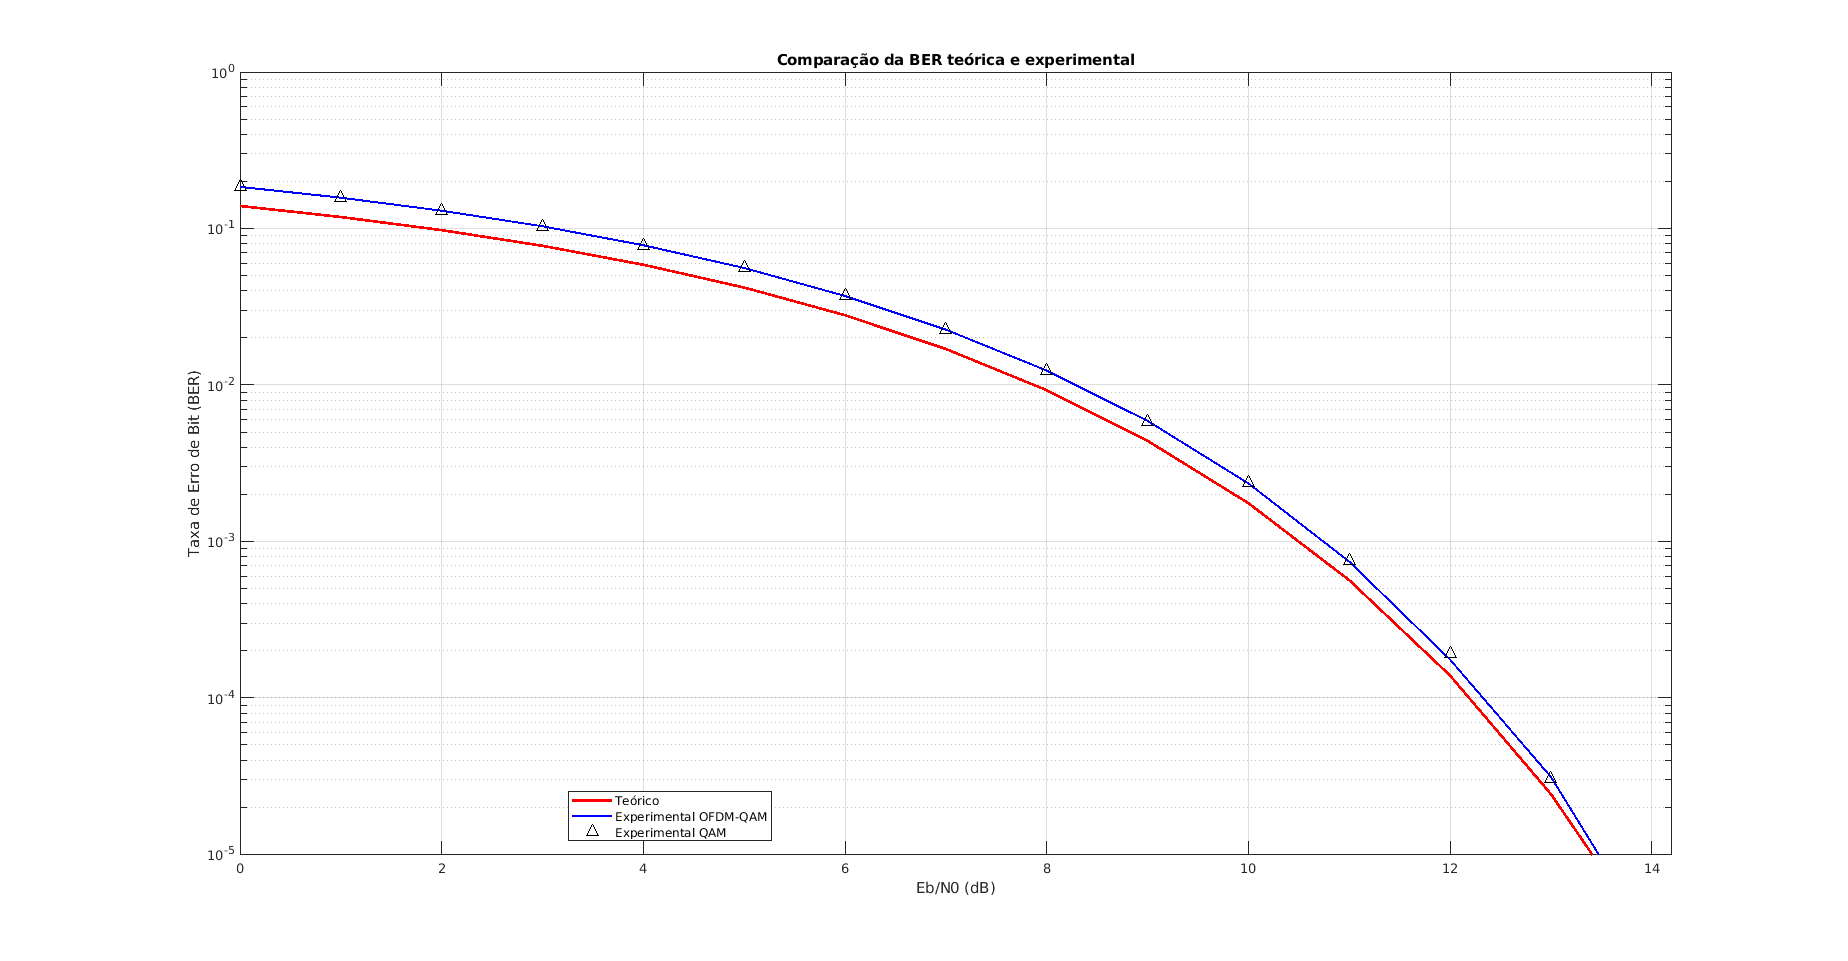

##  Código da BER vs Eb/No com OFDM e sem OFDM para modulação BPSK:

In [ ]:
clear all; clc;close all
EbN0dB = 0:1:14;

BER_TEO = zeros(0,length(EbN0dB));

for ik = 1:length(EbN0dB)
    for jk = 1:500
        N=100000;
        d=rand(1,N)>0.5; %data generation
        X=2*d-1; %BPSK modulation
        
        % Convertendo bit para símbolo no sinal BPSK
        bpskSymbols = (-1)*pskmod(double(d), 2);
        
        %Sinal OFDM
        ofdmsym_sp = ifft(reshape(X,length(X)/50, 50));
        xn = reshape(ofdmsym_sp,1,length(X));
        
        % Adição de ruído
        Eb = xn*xn'/length(xn);
        N0 = Eb*10.^(-EbN0dB(ik)/10);
        wgn = sqrt(N0/2) * [1 j] *  randn(2, length(xn));

        rn = xn + wgn;
        
        %Adição de ruído no sinal sem OFDM 
        Eb = bpskSymbols*bpskSymbols'/length(bpskSymbols);
        N0 = Eb*10.^(-EbN0dB(ik)/10);
        wgn2 = sqrt(N0/2) * [1 j] *  randn(2, length(xn));
        
        rn_sem_ofdm = bpskSymbols + wgn2; 
        
        Rt_freq = fft(reshape(rn,length(rn)/(50),50));
        Y = reshape(Rt_freq,1,length(xn));
        
        %Demodulação sem OFDM
        bits_recebidos_sem_ofdm = sign(real(rn_sem_ofdm));
        
        %Demodulação OFDM BPSK 
        bits_recebidos = sign(real(Y));

        %BER Simulado
        BER_SIM_OFDM(jk) = sum(bits_recebidos ~= X)/length(X);
        BER_SIM_S_OFDM(jk) = sum(bits_recebidos_sem_ofdm ~= X)/length(X); 
        
    end
    %BER teórico
    BER_TEO(ik) = 0.5*erfc(sqrt(10^(EbN0dB(ik)/10)));
    %BER simulado
    BER_SIM_MC_OFDM(ik) = mean(BER_SIM_OFDM);
    BER_SIM_MC_S_OFDM(ik) = mean(BER_SIM_S_OFDM);
end

semilogy(EbN0dB, BER_TEO, 'r-', 'LineWidth', 2); 
hold on;
semilogy(EbN0dB, BER_SIM_MC_OFDM, 'b-', 'LineWidth', 1.5);
semilogy(EbN0dB, BER_SIM_MC_S_OFDM, 'k^', 'MarkerSize', 8);

xlabel('Eb/N0 (dB)');
ylabel('Taxa de Erro de Bit (BER)');
title('Comparação da BER teórica e simulada');
legend('Teórico', 'OFDM-BPSK', 'BPSK', 'Location', 'best');
grid on;

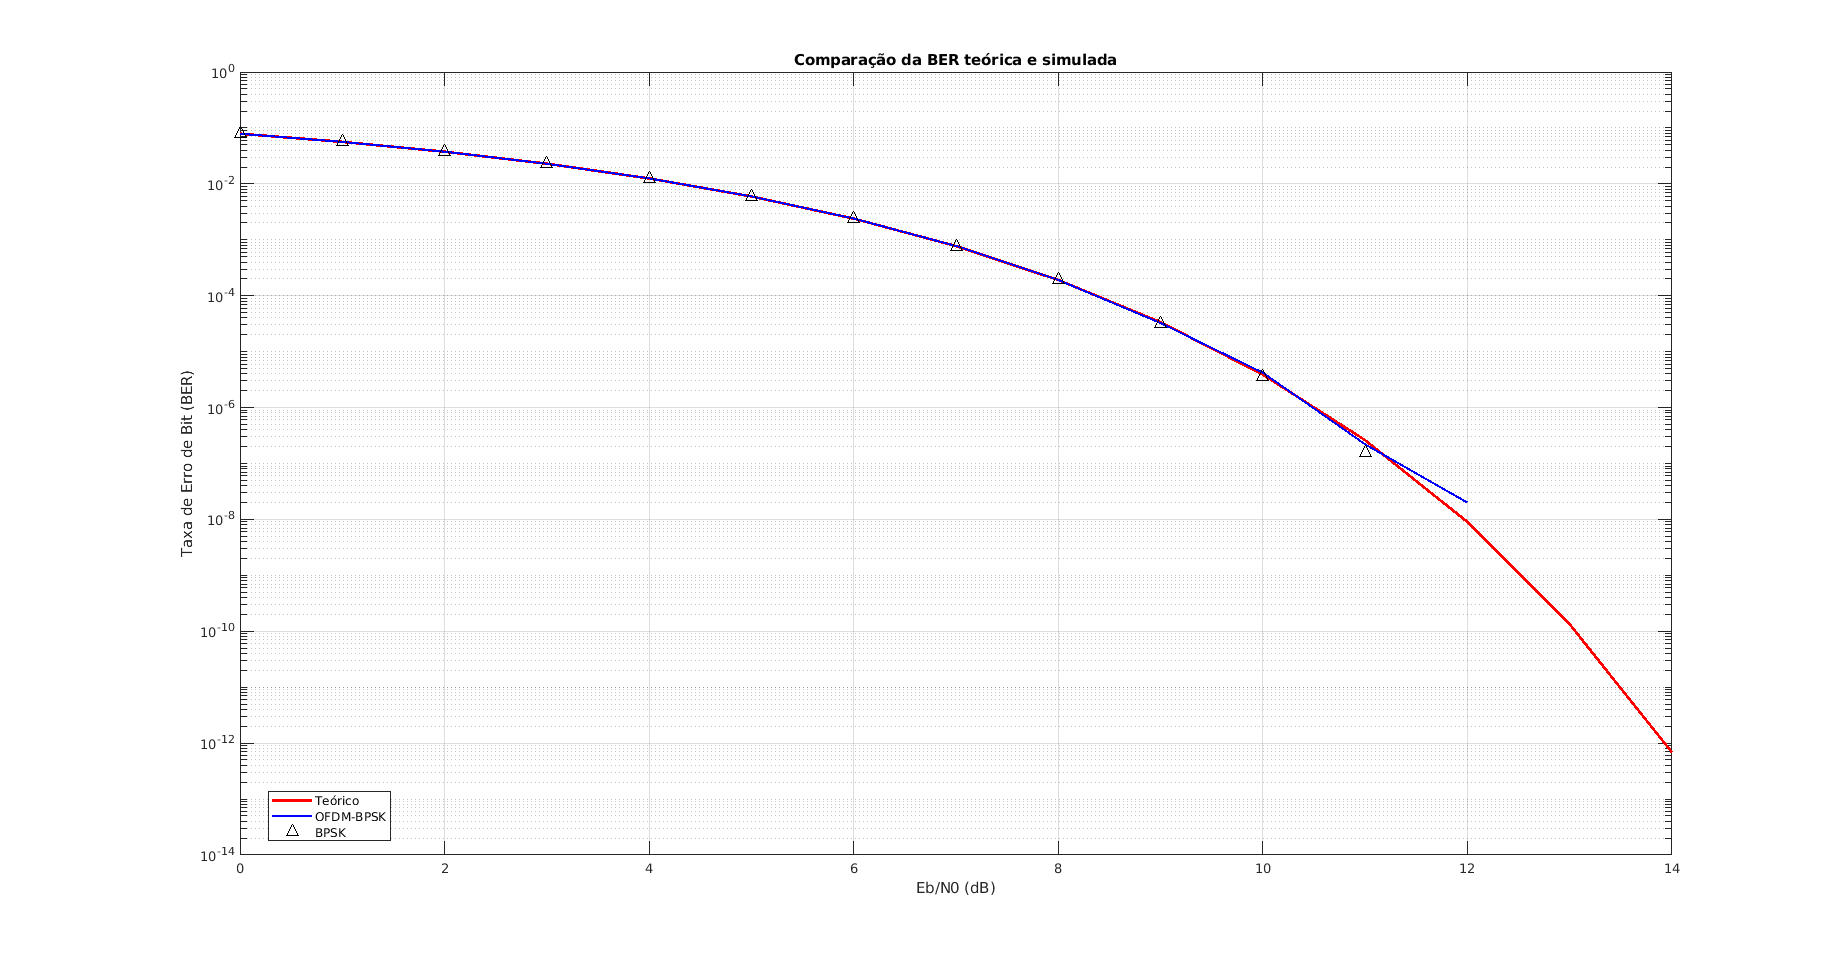